In [1]:
import pandas
import seaborn
import numpy

import sklearn.impute
import sklearn.preprocessing
import sklearn.decomposition
pandas.set_option('display.max_colwidth', None)  # Set to None for unlimited column width

 
%matplotlib inline

In [2]:
data_train = pandas.read_csv('../data/high_salary.train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
2103,438607793.0,1341.0,2.0,self-emp-not-inc,335549.0,prof-school,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,USA,united-states,1.0
14649,555786276.0,5891.0,0.0,private,98287.0,hs-grad,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
7379,350318677.0,4291.0,2.0,self-emp-not-inc,127740.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,USA,united-states,0.0
24479,356142771.0,3392.0,2.0,self-emp-not-inc,48553.0,some-college,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
19532,385803045.0,492.0,3.0,private,403061.0,1st-4th,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,MEX,mexico,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,181655516.0,361.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
2192,796404433.0,950.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
8250,622635909.0,8689.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [3]:
data_test= pandas.read_csv('../data/high_salary.test.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,335086368.0,4170.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,732733728.0,5442.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
13594,807579036.0,7659.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
14400,201637967.0,4318.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
14333,758267678.0,8392.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,928104737.0,5063.0,1.0,private,346736.0,assoc-acdm,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,USA,united-states,0.0
2952,516722538.0,6064.0,2.0,private,54422.0,assoc-acdm,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,USA,united-states,1.0
9470,197607445.0,1195.0,4.0,state-gov,124971.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN,NaN,1.0


In [4]:
data_live= pandas.read_csv('../data/high_salary.live.csv').set_index('id')
data_live

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
id,,,,,,,,,,,,,,,,,
6111,565712576.0,9337.0,0.0,private,287357.0,11th,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
11214,329599477.0,6457.0,1.0,private,167558.0,hs-grad,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,MEX,mexico
5554,222432362.0,189.0,4.0,private,27385.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
25131,209882990.0,2048.0,2.0,local-gov,153976.0,masters,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,USA,united-states
14324,936607310.0,8185.0,3.0,private,20956.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,331613078.0,6349.0,4.0,private,117898.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
8375,353499588.0,5768.0,4.0,private,298546.0,hs-grad,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,USA,united-states
13888,604365500.0,6286.0,1.0,private,36340.0,11th,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,USA,united-states


In [5]:
data_train.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [6]:
unique_values_data_train = pandas.DataFrame({column: [data_train[column].unique()] for column in data_train.columns}).T
unique_values_data_train.columns = ['Unique Values']
unique_values_data_train

,Unique Values
social-security-number,"[438607793.0, 555786276.0, 350318677.0, 356142771.0, 385803045.0, 416227110.0, 716207410.0, 431455994.0, 174071120.0, 886868006.0, 502138829.0, 981226363.0, 709120497.0, 323262945.0, 214744561.0, 239855072.0, 542521904.0, 219335419.0, 779356319.0, 793273505.0, 636152431.0, 663663491.0, 564418479.0, 437358492.0, 976570473.0, 224837318.0, 768922801.0, 613820744.0, 558734159.0, 678428792.0, 592851636.0, 677452312.0, 648213258.0, 804246780.0, 735811806.0, 349598997.0, 689625427.0, 922096742.0, 199632230.0, 345978762.0, 377915178.0, 469633627.0, 904698853.0, 841841677.0, 369838418.0, 407947446.0, 407961853.0, 151283570.0, 591251602.0, 282852582.0, 827642965.0, 943015417.0, 496359826.0, 399101934.0, 829503128.0, 840480134.0, 620116809.0, 414287830.0, 156379178.0, 388252434.0, 656378700.0, 334325988.0, 667965141.0, 463786044.0, 926435206.0, 141929682.0, 844885838.0, 609785017.0, 478669833.0, 507962186.0, 596898774.0, 993717433.0, 718772309.0, 522187146.0, 636266293.0, 184742156.0, 878881883.0, 588933595.0, 680264294.0, 722583256.0, 532630589.0, 537429292.0, 146389001.0, 395404158.0, 800838455.0, 261859616.0, 584674351.0, 114291923.0, 152548476.0, 829673679.0, 561924071.0, 371416319.0, 342698403.0, 488718833.0, 104229974.0, 880255048.0, 580161508.0, 236507379.0, 804050882.0, 887051579.0, ...]"
house-number,"[1341.0, 5891.0, 4291.0, 3392.0, 492.0, 2291.0, 5586.0, 6129.0, 6870.0, 9967.0, 7684.0, 5848.0, 7024.0, 1052.0, 4177.0, 1916.0, 7835.0, 3321.0, 6530.0, 4916.0, 1652.0, 1056.0, 1937.0, 6151.0, 3963.0, 8298.0, 2693.0, 6135.0, 7041.0, 6921.0, 9148.0, 8282.0, 8202.0, 3705.0, 2279.0, 7248.0, 2424.0, 3079.0, 3878.0, 335.0, 639.0, 6605.0, 4351.0, 1587.0, 5526.0, 7057.0, 4829.0, 3239.0, 3649.0, 3949.0, 4942.0, 1301.0, 1515.0, 5223.0, 2041.0, 3025.0, 7311.0, 6549.0, 6598.0, 1780.0, 9670.0, 6195.0, 341.0, 1037.0, 5767.0, 8388.0, 6275.0, 9591.0, 7626.0, 5849.0, 3829.0, 4169.0, 4110.0, 8782.0, 2510.0, 3914.0, 7743.0, 9822.0, 9311.0, 1455.0, 2862.0, 4582.0, 2779.0, 7738.0, 5376.0, 2134.0, 9378.0, 7203.0, 3615.0, 8174.0, 9896.0, 5382.0, 8269.0, 6239.0, 8085.0, 8230.0, 1036.0, 176.0, 6934.0, 4535.0, ...]"
age-group,"[2.0, 0.0, 3.0, 4.0, 1.0, nan]"
workclass,"[self-emp-not-inc, private, nan, self-emp-inc, local-gov, federal-gov, state-gov, never-worked, without-pay]"
fnlwgt,"[335549.0, 98287.0, 127740.0, 48553.0, 403061.0, 202872.0, 162825.0, 169104.0, 40052.0, 96844.0, 475322.0, 155293.0, 160192.0, 91039.0, 27763.0, 111476.0, 383384.0, 237943.0, 581128.0, 188563.0, 286689.0, 96130.0, 120131.0, 171331.0, 120676.0, 191503.0, 211948.0, 183470.0, 355700.0, 76720.0, 34419.0, 24264.0, 224141.0, 200295.0, 144460.0, 436493.0, 125892.0, 140001.0, 136137.0, 120270.0, 60269.0, 186121.0, 159109.0, 177307.0, 414994.0, 223131.0, 144259.0, 342709.0, 195105.0, 114874.0, 98586.0, 184529.0, 189346.0, 533660.0, 180052.0, 95708.0, 33551.0, 85604.0, 159770.0, 423217.0, 75313.0, 161155.0, 149368.0, 303973.0, 297322.0, 199903.0, 188861.0, 282153.0, 225724.0, 27776.0, 373344.0, 115431.0, 269722.0, 80655.0, 400535.0, 154374.0, 141537.0, 594187.0, 197583.0, 141481.0, 203784.0, 77132.0, 161472.0, 156774.0, 35034.0, 172034.0, 202692.0, 100950.0, 109912.0, 124076.0, 193882.0, 171216.0, 122353.0, 263970.0, 197886.0, 158592.0, 108247.0, 34862.0, 28160.0, 190385.0, ...]"
education,"[prof-school, hs-grad, some-college, 1st-4th, masters, bachelors, 11th, assoc-acdm, assoc-voc, doctorate, 7th-8th, 10th, 9th, 5th-6th, 12th, nan, preschool]"
education-num,"[15.0, 9.0, 10.0, 2.0, 14.0, 13.0, 7.0, 12.0, 11.0, 16.0, 4.0, 6.0, 5.0, 3.0, 8.0, 1.0, nan]"
marital-status,"[never-married, married-civ-spouse, separated, divorced, married-af-spouse, widowed, married-spouse-absent, nan]"
occupation,"[prof-specialty, sales, exec-managerial, craft-repair, machine-op-inspct, nan, other-service, handlers-cleaners, tech-support, transport-moving, farming-fishing, priv-house-serv, adm-clerical, protective-serv, armed-forces]"
relationship,"[not-in-family, husban

In [7]:
categorical_features= [
    'social-security-number',
    'house-number',
    'age-group',
    'workclass',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
    'native-country-code',
    'native-country'
]

In [8]:
#check if there are mismatches for native-country-code and native-country
country_mapping = {
    "USA": ["united-states"], 
    "MEX": ["mexico"], 
    "GBR": ["england", "scotland"],  # Both england and scotland are valid
    "ITA": ["italy"], 
    "SLV": ["el-salvador"],
    "CAN": ["canada"], 
    "DUE": ["germany"], 
    "JAM": ["jamaica"], 
    "ECU": ["ecuador"], 
    "JPN": ["japan"], 
    "DOM": ["dominican-republic"], 
    "IRL": ["ireland"], 
    "PHL": ["philippines"], 
    "CUB": ["cuba"], 
    "VNM": ["vietnam"], 
    "GTM": ["guatemala"], 
    "TWN": ["taiwan"], 
    "HUN": ["hungary"], 
    "FRA": ["france"],
    "UMI": ["outlying-us(guam-usvi-etc)"], 
    "HKG": ["hong"], 
    "KHM": ["cambodia"], 
    "IRN": ["iran"], 
    "CHN": ["china"], 
    "COL": ["columbia"], 
    "PRI": ["puerto-rico"], 
    "YUG": ["yugoslavia"], 
    "POL": ["poland"], 
    "GRC": ["greece"], 
    "TTO": ["trinadad&tobago"], 
    "IND": ["india"], 
    "NIC": ["nicaragua"], 
    "ZAF": ["south"], 
    "PRT": ["portugal"], 
    "HND": ["honduras"], 
    "THA": ["thailand"], 
    "HTI": ["haiti"], 
    "LAO": ["laos"], 
    "PER": ["peru"], 
    "NLD": ["holand-netherlands"]
}
def validate_country(row):
    code = row['native-country-code']
    country = row['native-country']
    #ignore missing values for validation
    if pandas.isna(code) or pandas.isna(country):
        return True
    expected_countries = country_mapping.get(code)
    if expected_countries and country in expected_countries:
        return True
    return False
    
data_train['is_valid'] = data_train.apply(validate_country, axis=1)

mismatches = data_train[data_train['is_valid'] == False]

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

Total mismatches: 0


In [9]:
#removing irrelavent and duplicate features
columns_to_remove = ['social-security-number', 'house-number', 'education', 'native-country-code']

categorical_features = [feature for feature in categorical_features if feature not in columns_to_remove]

categorical_features

['age-group',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native-country']

In [10]:
#label distribution
data_train['label'].value_counts()

label
0.0    9102
1.0    6573
Name: count, dtype: int64

In [11]:
data_test['label'].value_counts()

label
0.0    3033
1.0    2192
Name: count, dtype: int64

In [12]:
data_train.isna().sum(axis='index')

social-security-number     11
house-number               18
age-group                   6
workclass                 792
fnlwgt                     16
education                  15
education-num              12
marital-status             20
occupation                791
relationship               14
race                       13
sex                        14
capitalgain                17
capitalloss                14
hoursperweek               18
native-country-code       301
native-country            302
label                       0
is_valid                    0
dtype: int64

In [13]:
data_test.isna().sum(axis='index')

social-security-number      3
house-number                9
age-group                   7
workclass                 265
fnlwgt                      7
education                   5
education-num               2
marital-status              3
occupation                263
relationship                7
race                        9
sex                         8
capitalgain                 6
capitalloss                 7
hoursperweek                3
native-country-code        98
native-country             96
label                       0
dtype: int64

In [14]:
data_live.isna().sum(axis='index')

social-security-number      2
house-number                9
age-group                  13
workclass                 345
fnlwgt                      4
education                   7
education-num               8
marital-status              9
occupation                347
relationship               13
race                        7
sex                         7
capitalgain                 8
capitalloss                10
hoursperweek               13
native-country-code       122
native-country            123
dtype: int64

In [15]:
data_train_categorical_features= data_train[categorical_features]
data_train_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states


In [16]:
data_test_categorical_features= data_test[categorical_features]
data_test_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
12849,1.0,private,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states
1460,0.0,private,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico
13594,2.0,private,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,united-states
14400,3.0,private,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,united-states
14333,2.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,united-states
2952,2.0,private,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,united-states
9470,4.0,state-gov,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN


In [17]:
data_live_categorical_features= data_live[categorical_features]
data_live_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
6111,0.0,private,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,united-states
11214,1.0,private,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,mexico
5554,4.0,private,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
25131,2.0,local-gov,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states
14324,3.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
25998,4.0,private,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
8375,4.0,private,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,united-states
13888,1.0,private,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,united-states


In [18]:
categorical_imputer = sklearn.impute.SimpleImputer(
    strategy= 'most_frequent' 
)
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [19]:
categorical_imputer.fit(
    data_train_categorical_features
)

SimpleImputer(strategy='most_frequent')

In [20]:
data_train_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_train_categorical_features.index
)
data_train_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states


In [21]:
data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_test_categorical_features.index
)
data_test_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
12849,1.0,private,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states
1460,0.0,private,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico
13594,2.0,private,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,united-states
14400,3.0,private,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,0.0,0.0,2.0,united-states
14333,2.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,united-states
2952,2.0,private,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,united-states
9470,4.0,state-gov,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states


In [22]:
data_live_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_live_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_live_categorical_features.index
)
data_live_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
6111,0.0,private,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,united-states
11214,1.0,private,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,mexico
5554,4.0,private,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
25131,2.0,local-gov,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states
14324,3.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
25998,4.0,private,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
8375,4.0,private,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,united-states
13888,1.0,private,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,united-states


In [23]:
data_train_categorical_features.isna().sum(axis='index')

age-group         0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
dtype: int64

In [24]:
data_test_categorical_features.isna().sum(axis='index')

age-group         0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
dtype: int64

In [25]:
data_live_categorical_features.isna().sum(axis='index')

age-group         0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
dtype: int64

In [26]:
numerical_features=[
    'fnlwgt',
]

In [27]:
data_train_numerical_features= data_train[numerical_features]
data_train_numerical_features

,fnlwgt
id,
2103,335549.0
14649,98287.0
7379,127740.0
24479,48553.0
19532,403061.0
...,...
8695,42706.0
2192,103759.0
8250,316184.0


In [28]:
data_test_numerical_features= data_test[numerical_features]
data_test_numerical_features

,fnlwgt
id,
12849,509500.0
1460,243368.0
13594,144524.0
14400,150975.0
14333,136419.0
...,...
981,346736.0
2952,54422.0
9470,124971.0


In [29]:
data_live_numerical_features= data_live[numerical_features]
data_live_numerical_features

,fnlwgt
id,
6111,287357.0
11214,167558.0
5554,27385.0
25131,153976.0
14324,20956.0
...,...
25998,117898.0
8375,298546.0
13888,36340.0


In [30]:
# default mean value
numerical_imputer= sklearn.impute.SimpleImputer()
numerical_imputer

SimpleImputer()

In [31]:
numerical_imputer.fit(data_train_numerical_features)

SimpleImputer()

In [32]:
data_train_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_train_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_train_numerical_features.index
)
data_train_numerical_features

,fnlwgt
id,
2103,335549.0
14649,98287.0
7379,127740.0
24479,48553.0
19532,403061.0
...,...
8695,42706.0
2192,103759.0
8250,316184.0


In [33]:
data_test_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_test_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_test_numerical_features.index
)
data_test_numerical_features

,fnlwgt
id,
12849,509500.0
1460,243368.0
13594,144524.0
14400,150975.0
14333,136419.0
...,...
981,346736.0
2952,54422.0
9470,124971.0


In [34]:
data_live_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_live_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_live_numerical_features.index
)
data_live_numerical_features

,fnlwgt
id,
6111,287357.0
11214,167558.0
5554,27385.0
25131,153976.0
14324,20956.0
...,...
25998,117898.0
8375,298546.0
13888,36340.0


In [35]:
data_train_numerical_features.isna().sum(axis='index')

fnlwgt    0
dtype: int64

In [36]:
data_test_numerical_features.isna().sum(axis='index')

fnlwgt    0
dtype: int64

In [37]:
data_live_numerical_features.isna().sum(axis='index')

fnlwgt    0
dtype: int64

In [38]:
data_train = (
    data_train_categorical_features
    .join(data_train_numerical_features)
    .join(data_train['label'])
)
data_train

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt,label
id,,,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states,335549.0,1.0
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states,98287.0,0.0
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states,127740.0,0.0
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states,48553.0,0.0
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico,403061.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states,42706.0,0.0
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states,103759.0,0.0
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states,316184.0,0.0


In [39]:
data_test = (
    data_test_categorical_features
    .join(data_test_numerical_features)
    .join(data_test['label'])
)
data_test

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt,label
id,,,,,,,,,,,,,,
12849,1.0,private,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states,509500.0,1.0
1460,0.0,private,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico,243368.0,0.0
13594,2.0,private,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,united-states,144524.0,0.0
14400,3.0,private,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,0.0,0.0,2.0,united-states,150975.0,0.0
14333,2.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states,136419.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,united-states,346736.0,0.0
2952,2.0,private,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,united-states,54422.0,1.0
9470,4.0,state-gov,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states,124971.0,1.0


In [40]:
data_live = (
    data_live_categorical_features
    .join(data_live_numerical_features)
)
data_live

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt
id,,,,,,,,,,,,,
6111,0.0,private,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,united-states,287357.0
11214,1.0,private,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,mexico,167558.0
5554,4.0,private,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states,27385.0
25131,2.0,local-gov,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states,153976.0
14324,3.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,united-states,20956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,4.0,private,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states,117898.0
8375,4.0,private,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,united-states,298546.0
13888,1.0,private,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,united-states,36340.0


In [41]:
# delete this block later

unique_values_data_train = pandas.DataFrame({column: [data_train[column].unique()] for column in data_train.columns}).T
unique_values_data_train.columns = ['Unique Values']
unique_values_data_train

,Unique Values
age-group,"[2.0, 0.0, 3.0, 4.0, 1.0]"
workclass,"[self-emp-not-inc, private, self-emp-inc, local-gov, federal-gov, state-gov, never-worked, without-pay]"
education-num,"[15.0, 9.0, 10.0, 2.0, 14.0, 13.0, 7.0, 12.0, 11.0, 16.0, 4.0, 6.0, 5.0, 3.0, 8.0, 1.0]"
marital-status,"[never-married, married-civ-spouse, separated, divorced, married-af-spouse, widowed, married-spouse-absent]"
occupation,"[prof-specialty, sales, exec-managerial, craft-repair, machine-op-inspct, other-service, handlers-cleaners, tech-support, transport-moving, farming-fishing, priv-house-serv, adm-clerical, protective-serv, armed-forces]"
relationship,"[not-in-family, husband, other-relative, wife, own-child, unmarried]"
race,"[white, amer-indian-eskimo, black, asian-pac-islander, other]"
sex,"[male, female]"
capitalgain,"[0.0, 4.0, 2.0, 3.0, 1.0]"
capitalloss,"[4.0, 0.0, 3.0, 2.0, 1.0]"


In [42]:
ordinal_features= [
    'age-group',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek'
]
ordinal_mapping = [
    [0.0, 1.0, 2.0, 3.0, 4.0],
    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
    [0.0, 1.0, 2.0, 3.0, 4.0],
    [0.0, 1.0, 2.0, 3.0, 4.0],
    [0.0, 1.0, 2.0, 3.0, 4.0]
]

In [43]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder

OrdinalEncoder(categories=[[0.0, 1.0, 2.0, 3.0, 4.0],
                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                            11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 1.0, 2.0, 3.0, 4.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0]])

In [44]:
ordinal_encoder.fit(
    X = data_train[ordinal_features]
)

OrdinalEncoder(categories=[[0.0, 1.0, 2.0, 3.0, 4.0],
                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                            11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 1.0, 2.0, 3.0, 4.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0]])

In [45]:
data_train_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_train[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_ordinal_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
2103,2.0,14.0,0.0,4.0,2.0
14649,0.0,8.0,0.0,0.0,3.0
7379,2.0,8.0,0.0,0.0,4.0
24479,2.0,9.0,0.0,0.0,3.0
19532,3.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...
8695,0.0,9.0,0.0,0.0,2.0
2192,2.0,9.0,2.0,0.0,2.0
8250,0.0,8.0,0.0,0.0,2.0


In [46]:
data_test_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_test[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_ordinal_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
12849,1.0,12.0,2.0,0.0,2.0
1460,0.0,0.0,0.0,0.0,3.0
13594,2.0,8.0,0.0,0.0,2.0
14400,3.0,8.0,0.0,0.0,2.0
14333,2.0,8.0,0.0,0.0,3.0
...,...,...,...,...,...
981,1.0,11.0,0.0,0.0,3.0
2952,2.0,11.0,0.0,0.0,2.0
9470,4.0,15.0,0.0,0.0,2.0


In [47]:
data_live_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_live[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_live_ordinal_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
6111,0.0,6.0,0.0,0.0,2.0
11214,1.0,8.0,0.0,0.0,1.0
5554,4.0,8.0,0.0,0.0,3.0
25131,2.0,13.0,0.0,0.0,2.0
14324,3.0,8.0,0.0,0.0,2.0
...,...,...,...,...,...
25998,4.0,12.0,0.0,0.0,3.0
8375,4.0,8.0,0.0,0.0,4.0
13888,1.0,6.0,0.0,0.0,1.0


In [48]:
nominal_features=[
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country'
]
nominal_mapping = [
    ["self-emp-not-inc", "private", "self-emp-inc", "local-gov", "federal-gov", "state-gov", "never-worked", "without-pay"],
    ["never-married", "married-civ-spouse", "separated", "divorced", "married-af-spouse", "widowed", "married-spouse-absent"],
    ["prof-specialty", "sales", "exec-managerial", "craft-repair", "machine-op-inspct", "other-service", "handlers-cleaners", "tech-support", "transport-moving", "farming-fishing", "priv-house-serv", "adm-clerical", "protective-serv", "armed-forces"],
    ["not-in-family", "husband", "other-relative", "wife", "own-child", "unmarried"],
    ["white", "amer-indian-eskimo", "black", "asian-pac-islander", "other"],
    ["male", "female"],
    ["united-states", "mexico", "england", "italy", "el-salvador", "canada", "germany", "jamaica", "ecuador", "japan", "dominican-republic", "ireland", "philippines", "cuba", "vietnam", "guatemala", "taiwan", "hungary", "france", "outlying-us(guam-usvi-etc)", "hong", "cambodia", "iran", "china", "columbia", "puerto-rico", "yugoslavia", "poland", "greece", "trinadad&tobago", "india", "nicaragua", "south", "portugal", "honduras", "thailand", "laos", "peru", "holand-netherlands", "haiti", "scotland"]
]
data_train

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt,label
id,,,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states,335549.0,1.0
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states,98287.0,0.0
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states,127740.0,0.0
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states,48553.0,0.0
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico,403061.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states,42706.0,0.0
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states,103759.0,0.0
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states,316184.0,0.0


In [49]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_mapping, sparse_output=False)
onehot_encoder

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                          ['united-states', 'mexico', 'england', 'italy',
                           'el-salvador', 'canada', 'germany', 'jamaica',
                           'ecuador', 'japan', 'dominican-republic', 'ireland',
                           'philippines', 'cuba', 'vietnam', 'guatemala',
                           'taiwan', 'hungary', 'france',
                           'outlying-us(guam-usvi-etc)', 'hong', 'cambodia',
                           'iran', 'china', 'columbia', 'puerto-rico',
                           'yugoslavia', 'poland', 'greece', 'trinadad&tobago', ...]],
              sparse_output=False)

In [50]:
onehot_encoder.fit(
    X=data_train[nominal_features]
)

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                          ['united-states', 'mexico', 'england', 'italy',
                           'el-salvador', 'canada', 'germany', 'jamaica',
                           'ecuador', 'japan', 'dominican-republic', 'ireland',
                           'philippines', 'cuba', 'vietnam', 'guatemala',
                           'taiwan', 'hungary', 'france',
                           'outlying-us(guam-usvi-etc)', 'hong', 'cambodia',
                           'iran', 'china', 'columbia', 'puerto-rico',
                           'yugoslavia', 'poland', 'greece', 'trinadad&tobago', ...]],
              sparse_output=False)

In [51]:
onehot_encoder.get_feature_names_out()

array(['workclass_self-emp-not-inc', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_local-gov',
       'workclass_federal-gov', 'workclass_state-gov',
       'workclass_never-worked', 'workclass_without-pay',
       'marital-status_never-married',
       'marital-status_married-civ-spouse', 'marital-status_separated',
       'marital-status_divorced', 'marital-status_married-af-spouse',
       'marital-status_widowed', 'marital-status_married-spouse-absent',
       'occupation_prof-specialty', 'occupation_sales',
       'occupation_exec-managerial', 'occupation_craft-repair',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_handlers-cleaners', 'occupation_tech-support',
       'occupation_transport-moving', 'occupation_farming-fishing',
       'occupation_priv-house-serv', 'occupation_adm-clerical',
       'occupation_protective-serv', 'occupation_armed-forces',
       'relationship_not-in-family', 'relationship_husband',
       'r

In [52]:
data_train_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
2103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data_test_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data_live_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_live[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_live_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
6111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [56]:
standard_scaler.fit(data_train[numerical_features])

StandardScaler()

In [57]:
data_train_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_train[numerical_features]),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_train_numerical_features.index
)
data_train_numerical_features

,fnlwgt
id,
2103,1.395470
14649,-0.873898
7379,-0.592186
24479,-1.349595
19532,2.041210
...,...
8695,-1.405521
2192,-0.821560
8250,1.210247


In [58]:
data_test_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_test[numerical_features]),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_test_numerical_features.index
)
data_test_numerical_features

,fnlwgt
id,
12849,3.059280
1460,0.513775
13594,-0.431650
14400,-0.369947
14333,-0.509173
...,...
981,1.502472
2952,-1.293459
9470,-0.618671


In [59]:
data_live_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_live[numerical_features]),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_live_numerical_features.index
)
data_live_numerical_features

,fnlwgt
id,
6111,0.934522
11214,-0.211334
5554,-1.552063
25131,-0.341243
14324,-1.613555
...,...
25998,-0.686323
8375,1.041543
13888,-1.466410


In [60]:
data_train = (
    data_train_numerical_features
        .join(data_train_ordinal_features)
        .join(data_train_nominal_features)
        .join(data_train['label'])
)
data_train

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,label
id,,,,,,,,,,,,,,,,,,,,,
2103,1.395470,2.0,14.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14649,-0.873898,0.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,-0.592186,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,-1.349595,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,2.041210,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.405521,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,-0.821560,2.0,9.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,1.210247,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
data_test = (
    data_test_numerical_features
        .join(data_test_ordinal_features)
        .join(data_test_nominal_features)
        .join(data_test['label'])
)
data_test

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,label
id,,,,,,,,,,,,,,,,,,,,,
12849,3.059280,1.0,12.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1460,0.513775,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,-0.431650,2.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,-0.369947,3.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,-0.509173,2.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.502472,1.0,11.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,-1.293459,2.0,11.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9470,-0.618671,4.0,15.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
data_live = (
    data_live_numerical_features
        .join(data_live_ordinal_features)
        .join(data_live_nominal_features)
)
data_live

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
6111,0.934522,0.0,6.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11214,-0.211334,1.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,-1.552063,4.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25131,-0.341243,2.0,13.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14324,-1.613555,3.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,-0.686323,4.0,12.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,1.041543,4.0,8.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13888,-1.466410,1.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
pca= sklearn.decomposition.PCA()
pca

PCA()

In [64]:
data_train_without_label = data_train.drop(['label'], axis = 'columns')
data_train_without_label

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
2103,1.395470,2.0,14.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,-0.873898,0.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,-0.592186,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,-1.349595,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,2.041210,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.405521,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,-0.821560,2.0,9.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,1.210247,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
data_test_without_label = data_test.drop(['label'], axis = 'columns')
data_test_without_label

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
12849,3.059280,1.0,12.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.513775,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,-0.431650,2.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,-0.369947,3.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,-0.509173,2.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.502472,1.0,11.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,-1.293459,2.0,11.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9470,-0.618671,4.0,15.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
pca.fit(data_train_without_label)

PCA()

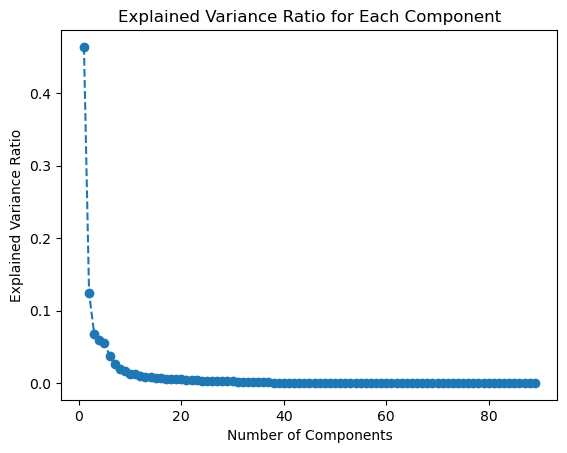

In [67]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.show()

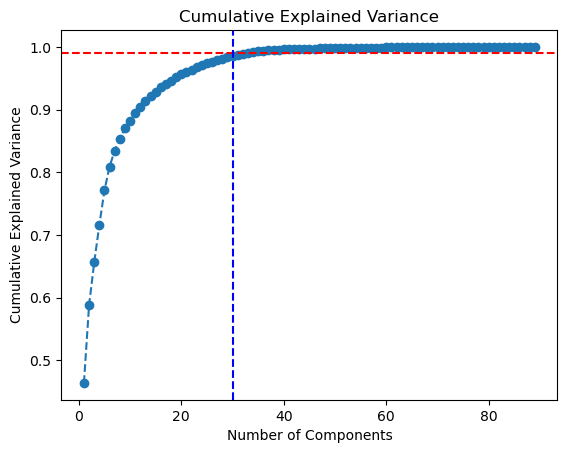

In [68]:
import numpy

cumulative_variance = numpy.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.99, color='r', linestyle='--')  # Choose 90% variance as threshold
plt.axvline(x= 30, color='b', linestyle='--')  # Choose 90% variance as threshold
plt.show()

In [69]:
data_train_pca= pca.transform(data_train_without_label)
data_train_pca

array([[-4.62783320e+00, -6.16020084e-01,  1.01130825e+00, ...,
         3.35969963e-16, -4.95328572e-17,  7.98249956e-16],
       [ 1.42635592e+00, -1.07092603e+00, -4.45978096e-01, ...,
        -2.46897125e-16,  7.53672331e-17, -6.31162189e-16],
       [ 1.22962630e+00,  9.49016045e-01, -6.28412476e-02, ...,
         5.84142067e-17,  4.63945292e-16, -6.86673340e-16],
       ...,
       [ 1.62832636e+00, -2.12141395e+00,  1.12454062e+00, ...,
        -3.57919427e-16, -1.88310735e-16,  2.29260655e-16],
       [-3.37027871e+00, -6.33653490e-01,  2.27895425e+00, ...,
         3.08214387e-16, -5.76888794e-16,  4.37427473e-16],
       [ 2.29389744e+00,  8.98853849e-01, -6.79155840e-01, ...,
         6.10622664e-16,  8.32667268e-16, -6.75831318e-16]])

In [70]:
data_test_pca= pca.transform(data_test_without_label)
data_test_pca

array([[-2.52966332e+00, -1.64159075e+00,  2.86490268e+00, ...,
         2.90305551e-18, -4.95328572e-17, -4.48256537e-17],
       [ 9.44943627e+00, -1.18351107e+00,  8.33858727e-01, ...,
        -3.30163852e-16,  3.59428202e-16, -1.00662140e-15],
       [ 1.54229398e+00, -1.34596243e-01, -6.57243026e-01, ...,
        -1.08119247e-16,  3.37338697e-17,  2.67424572e-16],
       ...,
       [-5.68836542e+00,  1.72657525e+00, -6.85347219e-01, ...,
         1.97192085e-16,  8.92450209e-17,  1.02029456e-15],
       [ 1.26701100e+00,  2.08788199e+00, -5.38200785e-01, ...,
         1.69436509e-16,  4.84761973e-16,  9.19680599e-16],
       [ 1.42863425e+00,  3.44253826e-01,  1.75367953e+00, ...,
         4.02455846e-16,  3.60822483e-16, -3.05793117e-16]])

In [71]:
data_live_pca= pca.transform(data_live)
data_live_pca

array([[ 3.48832509e+00, -1.25616545e+00,  1.12317600e+00, ...,
        -2.19141549e-16,  1.65572854e-16, -7.28306703e-16],
       [ 1.64782286e+00, -1.38987365e+00, -6.21277879e-01, ...,
        -2.46897125e-16,  2.20650324e-16,  4.05443509e-16],
       [ 1.23732147e+00,  2.53775442e+00, -1.19880115e+00, ...,
        -1.35874823e-16, -2.17772815e-17, -4.22995371e-16],
       ...,
       [ 3.60484841e+00, -8.82409382e-01, -1.79609988e+00, ...,
        -1.63630398e-16,  2.69656262e-16,  5.17224752e-16],
       [-3.53992517e+00, -8.75913706e-01, -1.10234670e-01, ...,
         3.63725539e-16, -1.48383876e-17, -3.19229030e-18],
       [ 5.87836824e-01, -2.22424191e+00, -2.00495532e-01, ...,
        -1.63630398e-16,  2.00267323e-16, -4.48256537e-17]])

In [72]:
data_train_pca= pandas.DataFrame(
    data= {
        'principal_feature_1': data_train_pca[:,0],
        'principal_feature_2': data_train_pca[:,1],
        'principal_feature_3': data_train_pca[:,2],
        'principal_feature_4': data_train_pca[:,3],
        'principal_feature_5': data_train_pca[:,4],
        'principal_feature_6': data_train_pca[:,5],
        'principal_feature_7': data_train_pca[:,6],
        'principal_feature_8': data_train_pca[:,7],
        'principal_feature_9': data_train_pca[:,8],
        'principal_feature_10': data_train_pca[:,9],
        'principal_feature_11': data_train_pca[:,10],
        'principal_feature_12': data_train_pca[:,11],
        'principal_feature_13': data_train_pca[:,12],
        'principal_feature_14': data_train_pca[:,13],
        'principal_feature_15': data_train_pca[:,14],
        'principal_feature_16': data_train_pca[:,15],
        'principal_feature_17': data_train_pca[:,16],
        'principal_feature_18': data_train_pca[:,17],
        'principal_feature_19': data_train_pca[:,18],
        'principal_feature_20': data_train_pca[:,19],
        'principal_feature_21': data_train_pca[:,20],
        'principal_feature_22': data_train_pca[:,21],
        'principal_feature_23': data_train_pca[:,22],
        'principal_feature_24': data_train_pca[:,23],
        'principal_feature_25': data_train_pca[:,24],
        'principal_feature_26': data_train_pca[:,25],
        'principal_feature_27': data_train_pca[:,26],
        'principal_feature_28': data_train_pca[:,27],
        'principal_feature_29': data_train_pca[:,28],
        'principal_feature_30': data_train_pca[:,29],
        'label': data_train['label']
    },
    index= data_train.index
)
data_train_pca

,principal_feature_1,principal_feature_2,principal_feature_3,principal_feature_4,principal_feature_5,principal_feature_6,principal_feature_7,principal_feature_8,principal_feature_9,principal_feature_10,...,principal_feature_22,principal_feature_23,principal_feature_24,principal_feature_25,principal_feature_26,principal_feature_27,principal_feature_28,principal_feature_29,principal_feature_30,label
id,,,,,,,,,,,,,,,,,,,,,
2103,-4.627833,-0.616020,1.011308,1.157509,-0.969749,0.263241,3.614747,-1.278219,1.025982,-0.205857,...,0.037443,-0.181950,-0.087537,-0.069821,-0.123980,-0.054105,-0.005652,-0.010169,0.037983,1.0
14649,1.426356,-1.070926,-0.445978,-2.012902,-0.774684,-0.178957,-0.175381,0.390812,-0.219342,-0.261077,...,-0.106603,-0.137346,-0.124422,0.099997,0.049905,-0.067296,0.025073,0.048250,-0.014505,0.0
7379,1.229626,0.949016,-0.062841,-1.722606,-1.057586,0.778410,-0.248871,0.273507,0.549379,1.051496,...,0.115777,-0.267204,-0.145887,0.055045,0.000938,-0.048675,0.003114,-0.005442,0.040276,0.0
24479,0.340879,0.772770,-0.966337,-1.342151,-0.797795,0.009330,-0.323072,0.091520,0.804870,0.016989,...,0.171550,-0.138507,-0.049719,-0.004557,0.014382,-0.041696,-0.038541,-0.009300,0.079184,0.0
19532,8.454393,0.867535,1.817414,1.123255,0.361935,1.035225,0.181511,0.224099,-0.080475,-0.045255,...,0.648843,0.541824,-0.145423,0.128398,-0.384494,0.034080,-0.421518,0.158369,0.101909,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.512212,-1.893255,-1.413639,-0.895023,-0.016264,0.180163,-0.074641,-0.896404,0.101968,-0.400639,...,-0.288649,-0.106217,-0.152433,-0.060046,-0.110437,-0.056551,0.009905,0.029002,-0.090838,0.0
2192,0.239106,0.844269,-0.286306,-1.274410,1.260324,-0.665399,0.003516,0.114577,0.809178,0.039943,...,0.366398,-0.415290,0.758599,-0.127784,-0.054578,-0.312127,-0.002217,-0.006963,0.106812,0.0
8250,1.628326,-2.121414,1.124541,-0.151108,-0.128657,0.072585,-0.063428,-0.335233,0.055916,-0.155903,...,-0.414942,-0.074874,-0.270190,-0.033342,-0.304562,0.009105,-0.185370,0.018864,0.067465,0.0


In [73]:
data_test_pca= pandas.DataFrame(
    data= {
        'principal_feature_1': data_test_pca[:,0],
        'principal_feature_2': data_test_pca[:,1],
        'principal_feature_3': data_test_pca[:,2],
        'principal_feature_4': data_test_pca[:,3],
        'principal_feature_5': data_test_pca[:,4],
        'principal_feature_6': data_test_pca[:,5],
        'principal_feature_7': data_test_pca[:,6],
        'principal_feature_8': data_test_pca[:,7],
        'principal_feature_9': data_test_pca[:,8],
        'principal_feature_10': data_test_pca[:,9],
        'principal_feature_11': data_test_pca[:,10],
        'principal_feature_12': data_test_pca[:,11],
        'principal_feature_13': data_test_pca[:,12],
        'principal_feature_14': data_test_pca[:,13],
        'principal_feature_15': data_test_pca[:,14],
        'principal_feature_16': data_test_pca[:,15],
        'principal_feature_17': data_test_pca[:,16],
        'principal_feature_18': data_test_pca[:,17],
        'principal_feature_19': data_test_pca[:,18],
        'principal_feature_20': data_test_pca[:,19],
        'principal_feature_21': data_test_pca[:,20],
        'principal_feature_22': data_test_pca[:,21],
        'principal_feature_23': data_test_pca[:,22],
        'principal_feature_24': data_test_pca[:,23],
        'principal_feature_25': data_test_pca[:,24],
        'principal_feature_26': data_test_pca[:,25],
        'principal_feature_27': data_test_pca[:,26],
        'principal_feature_28': data_test_pca[:,27],
        'principal_feature_29': data_test_pca[:,28],
        'principal_feature_30': data_test_pca[:,29],
        'label': data_test['label']
    },
    index= data_test.index
)
data_test_pca

,principal_feature_1,principal_feature_2,principal_feature_3,principal_feature_4,principal_feature_5,principal_feature_6,principal_feature_7,principal_feature_8,principal_feature_9,principal_feature_10,...,principal_feature_22,principal_feature_23,principal_feature_24,principal_feature_25,principal_feature_26,principal_feature_27,principal_feature_28,principal_feature_29,principal_feature_30,label
id,,,,,,,,,,,,,,,,,,,,,
12849,-2.529663,-1.641591,2.864903,0.803503,1.737670,0.801562,0.188139,-0.092690,-0.252400,-0.105031,...,0.387157,0.131539,0.372928,0.037451,-0.008179,0.582622,0.240662,0.036037,-0.610412,1.0
1460,9.449436,-1.183511,0.833859,-1.595752,-0.139967,1.065736,0.185484,-0.697436,0.224629,-0.010876,...,-0.120743,-0.183633,-0.037570,0.047937,0.018714,0.209570,-0.438500,0.060292,-0.473126,0.0
13594,1.542294,-0.134596,-0.657243,0.644605,0.242141,0.990265,-0.056323,0.718081,-0.224429,-0.412291,...,0.613529,0.605861,-0.153596,-0.052940,-0.265630,-0.053976,-0.153889,0.024971,0.066410,0.0
14400,1.481957,0.701112,-0.671493,1.053917,0.293068,1.242219,-0.075156,0.031734,-0.307742,-0.382953,...,0.798174,0.595894,-0.105256,-0.028352,-0.201619,-0.061548,0.348414,-0.142604,0.170057,0.0
14333,1.370257,0.660851,-0.144946,-1.145911,-0.770998,0.032358,-0.272358,0.096973,-0.277951,-0.317778,...,-0.016604,-0.008151,-0.037029,0.038043,0.000604,-0.016760,0.006950,0.008103,0.016111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,-1.463753,-1.575735,1.244461,0.330942,-0.230320,1.226616,-0.056067,0.341036,-0.503454,0.942746,...,0.278305,-0.006929,0.102254,0.039527,0.048827,-0.014067,0.009054,0.021814,0.033544,0.0
2952,-1.572715,-0.065987,-1.473299,0.239852,0.006781,0.224335,-0.130173,1.132072,-0.189257,-0.465859,...,-0.429898,-0.002654,-0.064137,-0.046151,-0.096095,0.008211,-0.018136,0.045961,-0.040838,1.0
9470,-5.688365,1.726575,-0.685347,0.809722,-0.623519,-0.461609,-0.520905,-0.173177,0.559705,-0.280299,...,-0.257443,0.460223,0.162049,0.664105,0.071987,-0.106162,-0.142742,-0.163831,0.010580,1.0


In [74]:
data_live_pca= pandas.DataFrame(
    data= {
        'principal_feature_1': data_live_pca[:,0],
        'principal_feature_2': data_live_pca[:,1],
        'principal_feature_3': data_live_pca[:,2],
        'principal_feature_4': data_live_pca[:,3],
        'principal_feature_5': data_live_pca[:,4],
        'principal_feature_6': data_live_pca[:,5],
        'principal_feature_7': data_live_pca[:,6],
        'principal_feature_8': data_live_pca[:,7],
        'principal_feature_9': data_live_pca[:,8],
        'principal_feature_10': data_live_pca[:,9],
        'principal_feature_11': data_live_pca[:,10],
        'principal_feature_12': data_live_pca[:,11],
        'principal_feature_13': data_live_pca[:,12],
        'principal_feature_14': data_live_pca[:,13],
        'principal_feature_15': data_live_pca[:,14],
        'principal_feature_16': data_live_pca[:,15],
        'principal_feature_17': data_live_pca[:,16],
        'principal_feature_18': data_live_pca[:,17],
        'principal_feature_19': data_live_pca[:,18],
        'principal_feature_20': data_live_pca[:,19],
        'principal_feature_21': data_live_pca[:,20],
        'principal_feature_22': data_live_pca[:,21],
        'principal_feature_23': data_live_pca[:,22],
        'principal_feature_24': data_live_pca[:,23],
        'principal_feature_25': data_live_pca[:,24],
        'principal_feature_26': data_live_pca[:,25],
        'principal_feature_27': data_live_pca[:,26],
        'principal_feature_28': data_live_pca[:,27],
        'principal_feature_29': data_live_pca[:,28],
        'principal_feature_30': data_live_pca[:,29],
    },
    index= data_live.index
)
data_live_pca

,principal_feature_1,principal_feature_2,principal_feature_3,principal_feature_4,principal_feature_5,principal_feature_6,principal_feature_7,principal_feature_8,principal_feature_9,principal_feature_10,...,principal_feature_21,principal_feature_22,principal_feature_23,principal_feature_24,principal_feature_25,principal_feature_26,principal_feature_27,principal_feature_28,principal_feature_29,principal_feature_30
id,,,,,,,,,,,,,,,,,,,,,
6111,3.488325,-1.256165,1.123176,-1.003951,-0.494787,-0.790050,-0.086014,0.375001,-0.031166,-0.093147,...,-0.022148,0.049080,-0.067141,0.013177,0.129084,0.089252,0.121834,0.072382,-0.072718,-0.105557
11214,1.647823,-1.389874,-0.621278,0.805001,0.518986,0.025006,0.037185,0.369976,-0.171261,-0.237016,...,0.126140,0.033940,-0.098082,0.107652,0.147831,-0.211446,0.038495,-0.496630,0.241397,-0.079030
5554,1.237321,2.537754,-1.198801,-0.615160,-0.632448,0.320770,-0.281974,-0.083159,-0.655527,0.651871,...,-0.096277,-0.039146,-0.114018,-0.111590,0.097075,-0.066056,0.004516,-0.024835,0.023330,-0.022664
25131,-3.627364,0.122163,-0.315892,-0.041318,-0.616918,-0.664351,-0.392796,0.134720,0.858683,-0.236804,...,0.068749,0.210697,-0.350814,-0.172598,-0.051241,0.004946,-0.061256,-0.014816,-0.030126,-0.009540
14324,1.384555,1.494659,-1.394946,-0.492632,-0.395730,-0.542791,-0.286923,-0.121256,-0.310324,-0.351342,...,-0.091268,-0.007147,0.001929,-0.026492,0.031142,-0.036748,-0.002521,-0.031762,0.012798,0.008152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,-2.709689,2.104291,-0.482685,-0.052986,-0.801370,0.262405,-0.410491,-0.116681,-0.778323,0.623588,...,-0.019126,0.034145,-0.070851,-0.060023,0.067941,-0.033471,0.003658,-0.046795,0.011928,0.018331
8375,1.223580,2.390805,1.428279,-0.434241,-1.077865,1.051389,-0.332755,0.012327,-0.363204,-0.141400,...,0.004599,0.074313,-0.059536,-0.013953,0.025581,0.031291,0.260198,0.017722,-0.188212,-0.256276
13888,3.604848,-0.882409,-1.796100,0.345624,0.633046,0.121380,0.084745,0.671024,-0.106277,-0.272755,...,-0.197645,-0.159524,-0.036381,-0.088699,0.016082,-0.279673,0.015321,0.035149,-0.000452,0.030828


In [75]:
data_train_pca.to_csv('./data/features.train.csv')
data_test_pca.to_csv('./data/features.test.csv')
data_live_pca.to_csv('./data/features.live.csv')